<a href="https://colab.research.google.com/github/carlosdqlima/Analista-Dados-Bootcamp-SoulCode/blob/main/atividades-python/atividade-01-estat%C3%ADstica/Atividade_01_Banco_de_dados_%2B_Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 01 - Banco de dados + Estatística

In [ ]:
!pip install mysql-connector-python
!pip install pandas
import mysql.connector
from mysql.connector import Error

---

# Conexão e tratamento dados - locadora

---



In [ ]:

#Definir as credenciais e informações da conexão
servidor = '35.231.208.44'
basededados = 'locadora'
usuario = 'bd-soulcode'
senha = '@lunos2024'

#Criar a conexão com a Base de Dados

def connect_to_database():
  try:
    connection = mysql.connector.connect(
        host = servidor,
        database = basededados,
        user = usuario,
        password = senha
    )
    if connection.is_connected():
      print("Conexão bem-sucedidade ao banco de dados MySQL!")
      return connection
  except Error as e:
    print("Erro ao conectar ao MySQL", e)
    return None

#Chamar a função de conexão
connection = connect_to_database()

def list_all_tables(connection):
    try:
        cursor = connection.cursor()
        # Executa o comando SHOW TABLES para listar todas as tabelas no banco de dados
        cursor.execute("SHOW TABLES;")
        tables = cursor.fetchall()

        if tables:
            print("Tabelas no banco de dados:")
            for table in tables:
                print(table[0])  # `table[0]` contém o nome da tabela
        else:
            print("Nenhuma tabela encontrada.")

    except Error as e:
        print("Erro ao listar tabelas", e)

    finally:
        cursor.close()

# Chamar a função de conexão
connection = connect_to_database()

if connection:
    # Listar todas as tabelas
    list_all_tables(connection)

#Converter a conexão com BD em DataFrame Pandas
import pandas as pd
def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    dfpd = pd.DataFrame(data, columns=columns)
    return dfpd
  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

#Chamar a conexao com o banco de dados
connection = connect_to_database()

if connection:
  query = "SELECT * FROM aluguel;"
  df_aluguel = fecth_data_as_dataframe(connection, query)

  if df_aluguel is not None:
    print("Dados da Tabela aluguel:")
    print(df_aluguel)

df_aluguel.dtypes

df_aluguel['data_aluguel'] = pd.to_datetime(df_aluguel['data_aluguel'])


if connection:
  query = "SELECT * FROM carro;"
  df_carro = fecth_data_as_dataframe(connection, query)

  if df_carro is not None:
    print("Dados da Tabela carro:")
    print(df_carro)

df_carro.dtypes

df_carro['modelo'] = df_carro['modelo'].astype('string')

df_carro.dtypes

if connection:
  query = "SELECT * FROM cliente;"
  df_cliente = fecth_data_as_dataframe(connection, query)

  if df_cliente is not None:
    print("Dados da Tabela cliente:")
    print(df_cliente)

df_cliente.dtypes

df_cliente[['nome', 'cidade']] = df_cliente[['nome', 'cidade']].astype('string')

df_cliente[['sexo', 'estado', 'estadocivil']] = df_cliente[['sexo', 'estado', 'estadocivil']].astype('category')

df_cliente.dtypes

if connection:
  query = "SELECT * FROM marca;"
  df_marca = fecth_data_as_dataframe(connection, query)

  if df_marca is not None:
    print("Dados da Tabela marca:")
    print(df_marca)

df_marca.dtypes

df_marca['marca'] = df_marca['marca'].astype('string')

df_marca.dtypes

# juntar os dataframes em um único para realizar as analises
df_aluguel_cliente = pd.merge(df_aluguel, df_cliente, on='codcliente', how='left')

df_aluguel_cliente_carro = pd.merge(df_aluguel_cliente, df_carro, on='codcarro', how='left')

df_locadora = pd.merge(df_aluguel_cliente_carro, df_marca, on='codmarca', how='left')

display(df_locadora)

Conexão bem-sucedidade ao banco de dados MySQL!
Conexão bem-sucedidade ao banco de dados MySQL!
Tabelas no banco de dados:
aluguel
carro
cliente
marca
Conexão bem-sucedidade ao banco de dados MySQL!
Dados da Tabela aluguel:
   codaluguel  codcliente  codcarro data_aluguel
0           1           3         2   2023-04-01
1           2           2         1   2023-04-02
2           3           2         1   2023-04-03
3           4           2         3   2023-04-04
4           5           1         4   2023-04-05
5           6           1         4   2023-04-13
6           7           1         1   2023-04-15
7           8           5         2   2023-04-19
8           9           5         2   2023-04-21
9          10           3         1   2023-04-25
Dados da Tabela carro:
   codcarro  codmarca modelo  valor
0         1         1     Ka  100.0
1         2         2   Argo  150.0
2         3         3   Onix  170.0
3         4         4   Polo  150.0
4         5         5   Kwid  120.

,codaluguel,codcliente,codcarro,data_aluguel,nome,cidade,sexo,estado,estadocivil,codmarca,modelo,valor,marca
0,1,3,2,2023-04-01,Túlio Nascimento,Duque de Caxias,M,RJ,S,2,Argo,150.0,Fiat
1,2,2,1,2023-04-02,Bruna Pereira,Niterói,F,RJ,C,1,Ka,100.0,Ford
2,3,2,1,2023-04-03,Bruna Pereira,Niterói,F,RJ,C,1,Ka,100.0,Ford
3,4,2,3,2023-04-04,Bruna Pereira,Niterói,F,RJ,C,3,Onix,170.0,Chevrolet
4,5,1,4,2023-04-05,Ana Silva,Duque de Caxias,F,RJ,C,4,Polo,150.0,Volkswagen
5,6,1,4,2023-04-13,Ana Silva,Duque de Caxias,F,RJ,C,4,Polo,150.0,Volkswagen
6,7,1,1,2023-04-15,Ana Silva,Duque de Caxias,F,RJ,C,1,Ka,100.0,Ford
7,8,5,2,2023-04-19,Lúcia Andrade,São Paulo,F,SP,C,2,Argo,150.0,Fiat
8,9,5,2,2023-04-21,Lúcia Andrade,São Paulo,F,SP,C,2,Argo,150.0,Fiat
9,10,3,1,2023-04-25,Túlio Nascimento,Duque de Caxias,M,RJ,S,1,Ka,100.0,Ford


---

# Analises estatísticas - locadora

---



In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency

Média do valor aluguel: 132.0, Mediana do valor aluguel: 150.0, Moda do valor aluguel: 150.0 

Variância: 795.5555555555555, Desvio Padrão: 28.20559440174157

Principais medidas estatisticas sobre o preço do aluguel: 
count     10.000000
mean     132.000000
std       28.205594
min      100.000000
25%      100.000000
50%      150.000000
75%      150.000000
max      170.000000
Name: valor, dtype: float64


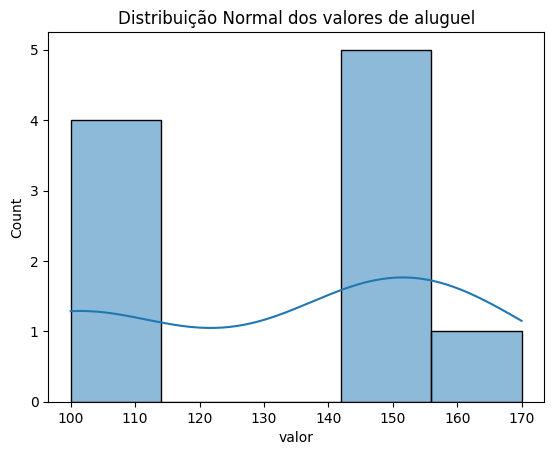

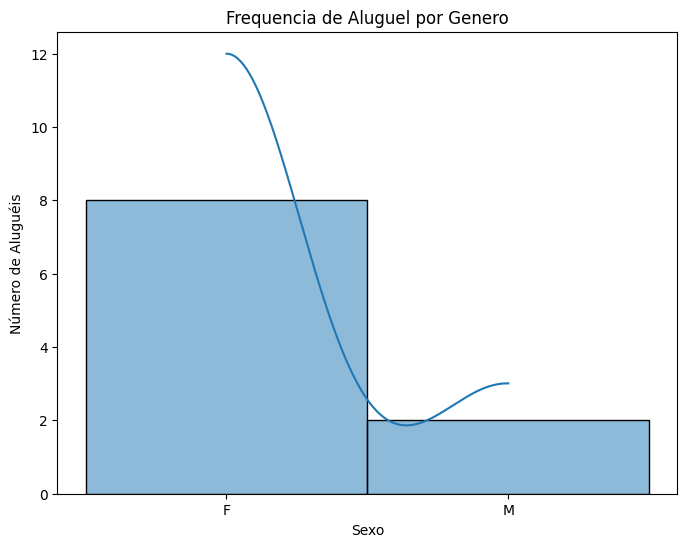

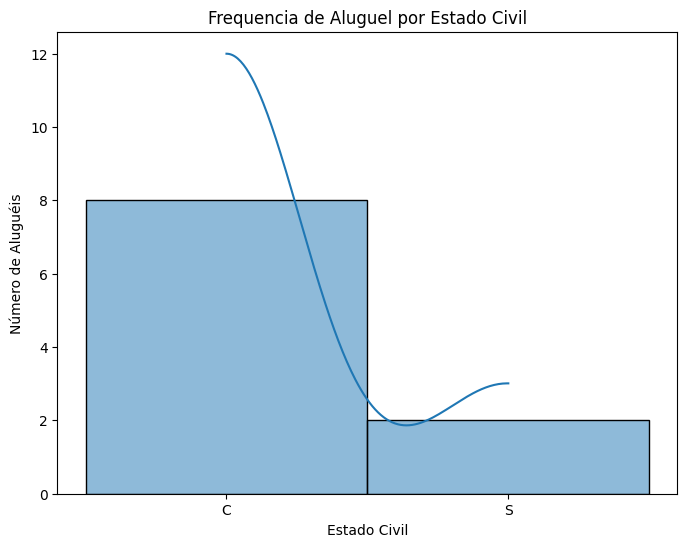

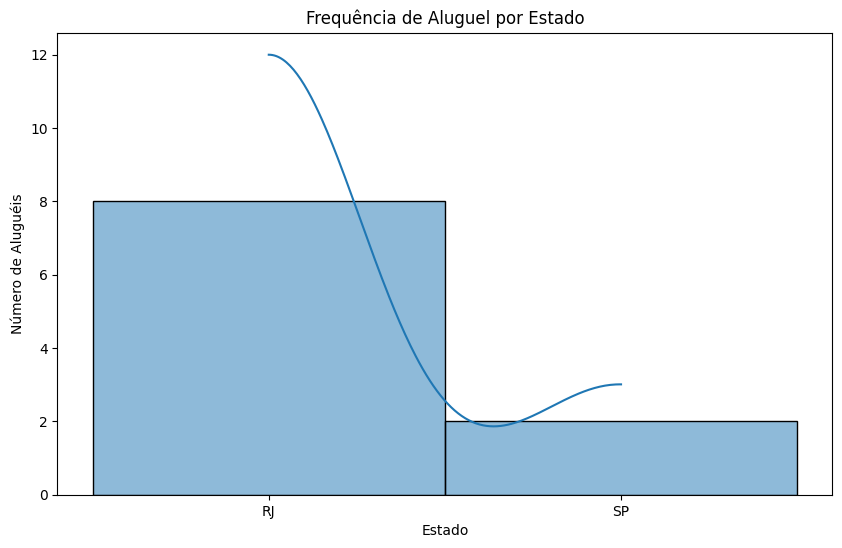

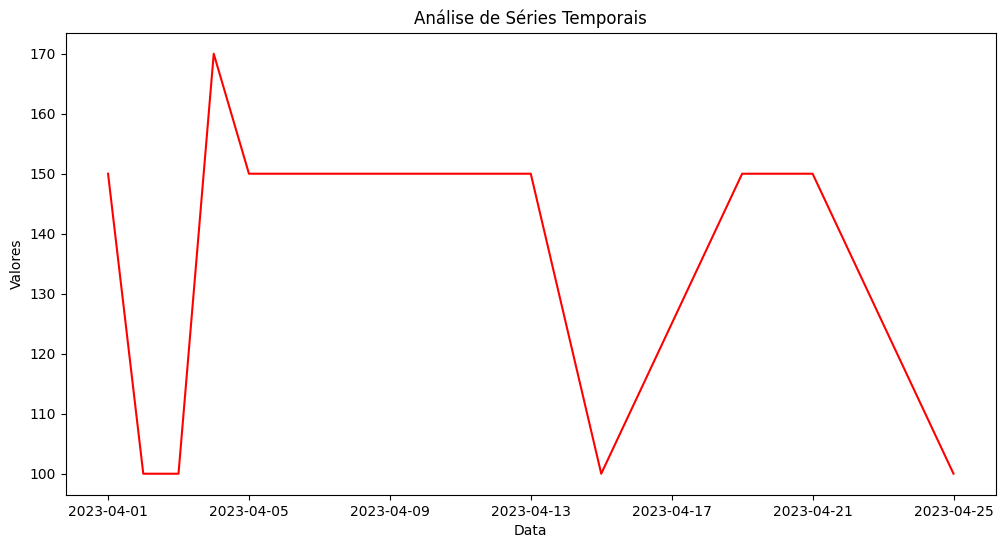

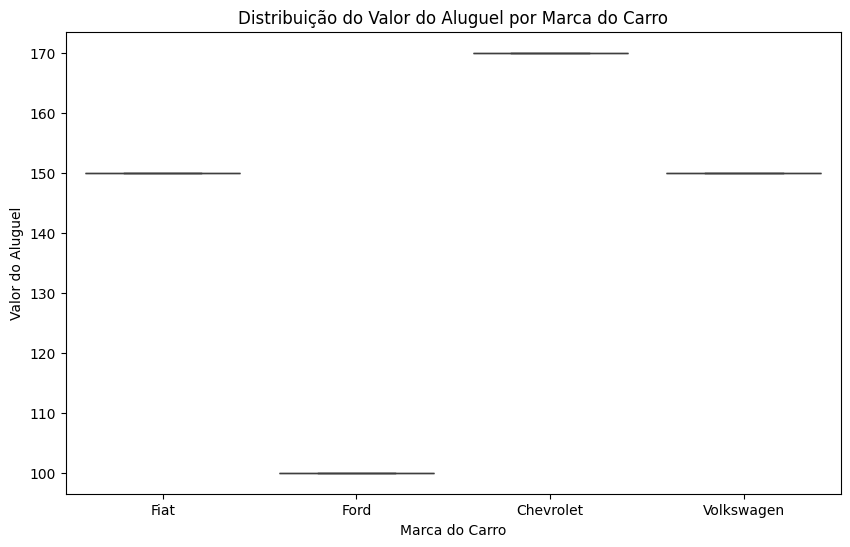

Teste t para Valor do Aluguel x Sexo:
T-statistic: -0.3732
P-value: 0.7187

Teste Qui-Quadrado para Marca do Carro x Estado do Cliente:
Chi-squared: 5.8333
P-value: 0.1200


In [ ]:
# Média do valor de aluguel
media = df_locadora['valor'].mean()
# Mediana do valor de aluguel
mediana = df_locadora['valor'].median()
# Moda do valor de aluguel
moda = df_locadora['valor'].mode()[0]
# Variância do valor de aluguel
variancia = df_locadora['valor'].var()
# Desvio padrão do valor de aluguel
desvio_padrao = df_locadora['valor'].std()

print(f"Média do valor aluguel: {media}, Mediana do valor aluguel: {mediana}, Moda do valor aluguel: {moda} \n")

print(f"Variância: {variancia}, Desvio Padrão: {desvio_padrao}\n")

# obter média, mediana, desvio padrão, mínimo e máximo da coluna 'valor' para obter dados estatisticos gerais
dados_estatisticos = df_locadora['valor'].describe()
print(f'Principais medidas estatisticas sobre o preço do aluguel: \n{dados_estatisticos}')

import seaborn as sns
import matplotlib.pyplot as plt

# Plotar a distribuição normal dos valores de aluguel
sns.histplot(df_locadora['valor'], kde=True)
plt.title('Distribuição Normal dos valores de aluguel')
plt.show()

# Histograma para análise de frequência Sexo
plt.figure(figsize=(8, 6))
sns.histplot(df_locadora['sexo'], bins=10, kde=True)
plt.title('Frequencia de Aluguel por Genero')
plt.xlabel('Sexo')
plt.ylabel('Número de Aluguéis')
plt.show()

# Histograma para análise de frequência Estado Civil
plt.figure(figsize=(8, 6))
sns.histplot(df_locadora['estadocivil'], bins=10, kde=True)
plt.title('Frequencia de Aluguel por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Aluguéis')
plt.show()

# Histograma para análise de frequência Estados
plt.figure(figsize=(10, 6))
sns.histplot(df_locadora['estado'], bins=10, kde=True)
plt.title('Frequência de Aluguel por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Aluguéis')
plt.show()

# Simulando dados de séries temporais
date_range = df_locadora['data_aluguel']
valores = df_locadora['valor']
serie_temporal = pd.DataFrame({'Data': date_range, 'Valores': valores})
serie_temporal.set_index('Data', inplace=True)

# Gráfico da série temporal
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal.index, serie_temporal['Valores'], color='red')
plt.title('Análise de Séries Temporais')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.show()

# Boxplot Valor do Aluguel x Marca
plt.figure(figsize=(10, 6))
sns.boxplot(x='marca', y='valor', data=df_locadora)
plt.title('Distribuição do Valor do Aluguel por Marca do Carro')
plt.xlabel('Marca do Carro')
plt.ylabel('Valor do Aluguel')
plt.show()

# Teste t para Valor do Aluguel x Sexo)
grupo_masculino = df_locadora[df_locadora['sexo'] == 'M']['valor']
grupo_feminino = df_locadora[df_locadora['sexo'] == 'F']['valor']

t_statistic, p_value = stats.ttest_ind(grupo_masculino, grupo_feminino)
print(f"Teste t para Valor do Aluguel x Sexo:")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Criando tabela de contingência
tabela = pd.crosstab(df_locadora['marca'], df_locadora['estado'])

# Realizando o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

print(f"\nTeste Qui-Quadrado para Marca do Carro x Estado do Cliente:")
print(f"Chi-squared: {chi2:.4f}")
print(f"P-value: {p:.4f}")


---

# Conexão e tratamento dados - logística

---



In [ ]:
#Definir as credenciais e informações da conexão
servidor = '35.231.208.44'
basededados = 'logistica'
usuario = 'bd-soulcode'
senha = '@lunos2024'

#Criar a conexão com a Base de Dados

def connect_to_database():
  try:
    connection = mysql.connector.connect(
        host = servidor,
        database = basededados,
        user = usuario,
        password = senha
    )
    if connection.is_connected():
      print("Conexão bem-sucedidade ao banco de dados MySQL!")
      return connection
  except Error as e:
    print("Erro ao conectar ao MySQL", e)
    return None

#Chamar a função de conexão
connection = connect_to_database()

def list_all_tables(connection):
    try:
        cursor = connection.cursor()
        # Executa o comando SHOW TABLES para listar todas as tabelas no banco de dados
        cursor.execute("SHOW TABLES;")
        tables = cursor.fetchall()

        if tables:
            print("Tabelas no banco de dados:")
            for table in tables:
                print(table[0])  # `table[0]` contém o nome da tabela
        else:
            print("Nenhuma tabela encontrada.")

    except Error as e:
        print("Erro ao listar tabelas", e)

    finally:
        cursor.close()

# Chamar a função de conexão
connection = connect_to_database()

if connection:
    # Listar todas as tabelas
    list_all_tables(connection)

#Converter a conexão com BD em DataFrame Pandas
import pandas as pd
def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    dfpd = pd.DataFrame(data, columns=columns)
    return dfpd
  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

#Chamar a conexao com o banco de dados
connection = connect_to_database()

if connection:
  query = "SELECT * FROM Motoristas;"
  df_motoristas = fecth_data_as_dataframe(connection, query)

  if df_motoristas is not None:
    print("Dados da Tabela Motoristas:")
    print(df_motoristas)

df_motoristas.dtypes

df_motoristas[['Nome','Regiao']] = df_motoristas[['Nome','Regiao']].astype('string')

if connection:
  query = "SELECT * FROM Pedidos;"
  df_pedidos = fecth_data_as_dataframe(connection, query)

  if df_pedidos is not None:
    print("Dados da Tabela Pedidos:")
    print(df_pedidos)

df_pedidos.dtypes

df_pedidos['Regiao'] = df_pedidos['Regiao'].astype('string')

if connection:
  query = "SELECT * FROM Veiculos;"
  df_veiculos = fecth_data_as_dataframe(connection, query)

  if df_veiculos is not None:
    print("Dados da Tabela Veiculos:")
    print(df_veiculos)

df_veiculos.dtypes

df_veiculos['Tipo'] = df_veiculos['Tipo'].astype('category')

Conexão bem-sucedidade ao banco de dados MySQL!
Conexão bem-sucedidade ao banco de dados MySQL!
Tabelas no banco de dados:
Motoristas
Pedidos
Veiculos
Conexão bem-sucedidade ao banco de dados MySQL!
Dados da Tabela Motoristas:
    ID_Motorista              Nome  Idade  Tempo_de_Empresa  \
0              1     William White     30                16   
1              2       Amber Stone     56                 8   
2              3      James Larson     45                 6   
3              4    Terri Hatfield     40                12   
4              5     Richard Moore     45                24   
5              6    Heather Miller     35                28   
6              7  Nicholas Jackson     59                21   
7              8        David Gill     43                 8   
8              9      Vicki Murphy     44                26   
9             10      Joshua Ortiz     42                28   
10            11        Tim Martin     38                 4   
11            12 

---

# Analises estatísticas - logística

---



Principais medidas estatisticas sobre o custo de manutenção mensal: 
count      10.00000
mean     3043.30260
std      1176.67627
min       839.11600
25%      2376.38750
50%      3372.94000
75%      3847.83500
max      4609.25000
Name: Custo_Manutencao_Mensal, dtype: float64

 Média do custo de manutenção mensal: 3043.3026, 
 Mediana do custo de manutenção mensal: 3372.94, 
 Moda do custo de manutenção mensal: 839.116 

Variância: 1384567.043409822, Desvio Padrão: 1176.6762695872735


 Média Idade Motoristas: 41.0
 Mediana Idade do Motoristas: 40.0,
 Moda da Idade dos Motoristas: 35,
 Desvio Padrão da Idade dos Motoristas: 9.060469373225533



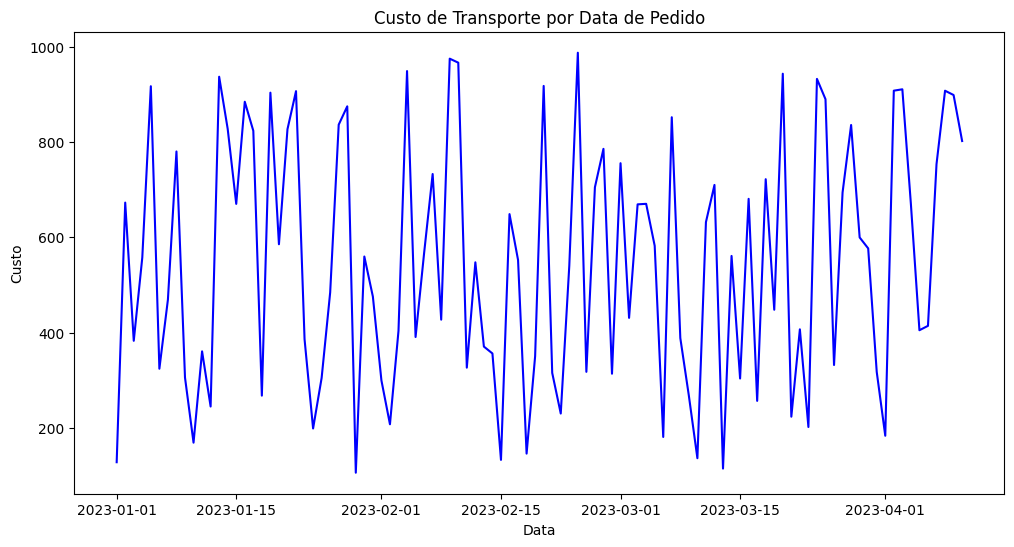

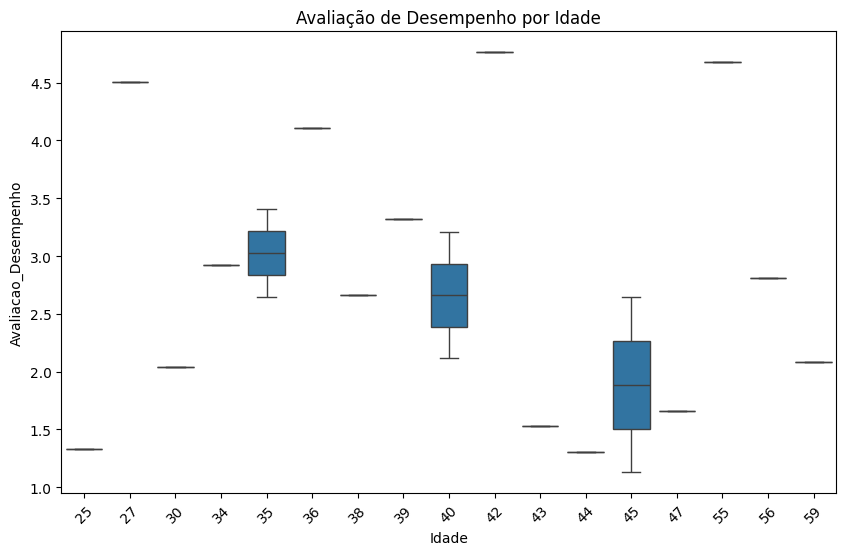

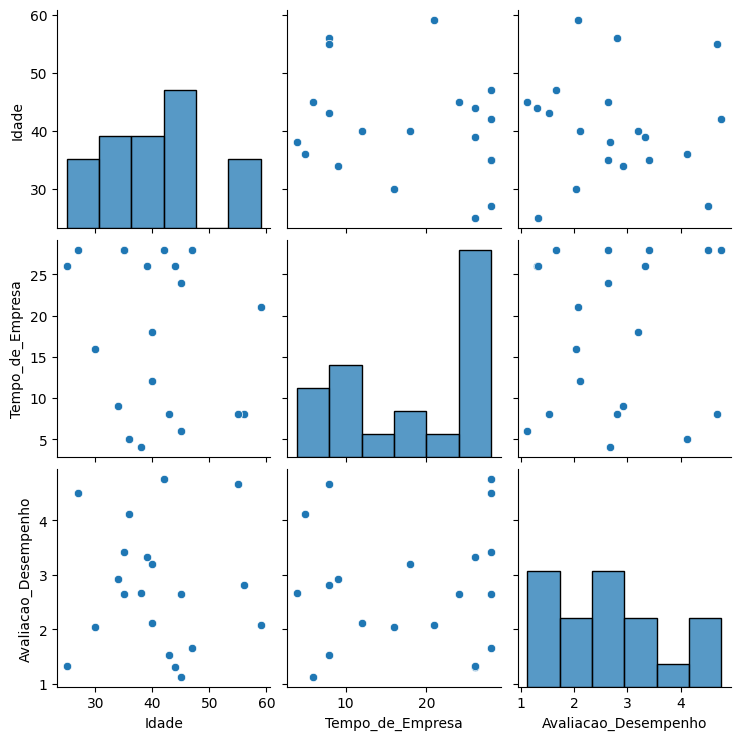

                         Idade  Tempo_de_Empresa  Avaliacao_Desempenho
Idade                 1.000000         -0.243601             -0.043225
Tempo_de_Empresa     -0.243601          1.000000              0.050747
Avaliacao_Desempenho -0.043225          0.050747              1.000000
Regiao
Jamestown           2
East Christopher    2
Laurenside          1
Ewingfort           1
Brookefurt          1
                   ..
East Jesse          1
Leburgh             1
Lake Adrianastad    1
Joshuaborough       1
Port Pamstad        1
Name: count, Length: 98, dtype: Int64


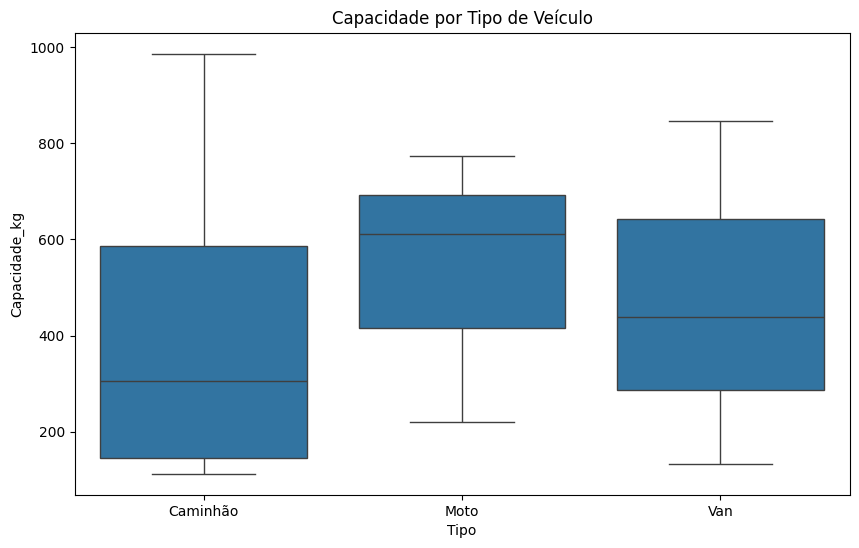

In [ ]:
# Média do custo de manutenção mensal
media = df_veiculos['Custo_Manutencao_Mensal'].mean()
# Mediana do custo de manutenção mensal
mediana = df_veiculos['Custo_Manutencao_Mensal'].median()
# Moda do custo de manutenção mensal
moda = df_veiculos['Custo_Manutencao_Mensal'].mode()[0]
# Variância do custo de manutenção mensal
variancia = df_veiculos['Custo_Manutencao_Mensal'].var()
# Desvio padrão do custo de manutenção mensal
desvio_padrao = df_veiculos['Custo_Manutencao_Mensal'].std()

# obter média, mediana, desvio padrão, mínimo e máximo da coluna 'Custo_Manutencao_Mensal' para obter dados estatisticos gerais
dados_estatisticos = df_veiculos['Custo_Manutencao_Mensal'].describe()
print(f'Principais medidas estatisticas sobre o custo de manutenção mensal: \n{dados_estatisticos}')

print(f"\n Média do custo de manutenção mensal: {media}, \n Mediana do custo de manutenção mensal: {mediana}, \n Moda do custo de manutenção mensal: {moda} \n")

print(f"Variância: {variancia}, Desvio Padrão: {desvio_padrao}\n")

# obter média, mediana, moda e desvio padrão da idade dos motoristas

media_idade = (df_motoristas['Idade'].mean()).round()
mediana_idade = df_motoristas['Idade'].median()
moda_idade = df_motoristas['Idade'].mode()[0]
desvio_padrao_idade = df_motoristas['Idade'].std()
print(f'\n Média Idade Motoristas: {media_idade}\n Mediana Idade do Motoristas: {mediana_idade},\n Moda da Idade dos Motoristas: {moda_idade},\n Desvio Padrão da Idade dos Motoristas: {desvio_padrao_idade}\n')

# Simulando dados de séries temporais
intervalo_tempo = df_pedidos['Data_Pedido']
custos = df_pedidos['Custo_Transporte']
serie_temporal = pd.DataFrame({'Data': intervalo_tempo, 'Custo transporte': custos})
serie_temporal.set_index('Data', inplace=True)

# Gráfico da série temporal
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal.index, serie_temporal['Custo transporte'], color='blue')
plt.title('Custo de Transporte por Data de Pedido')
plt.xlabel('Data')
plt.ylabel('Custo')
plt.show()

# Avaliação de Desempenho por Idade
plt.figure(figsize=(10, 6))
sns.boxplot(x='Idade', y='Avaliacao_Desempenho', data=df_motoristas)
plt.title('Avaliação de Desempenho por Idade')
plt.xticks(rotation=45)
plt.show()

# Relação entre Idade, Tempo de Empresa e Avaliação
sns.pairplot(df_motoristas[['Idade', 'Tempo_de_Empresa','Avaliacao_Desempenho']], kind='scatter')
plt.show()

print(df_motoristas[['Idade', 'Tempo_de_Empresa', 'Avaliacao_Desempenho']].corr())

# Quanntidade de pedidos por Região
pedidos_por_regiao = df_pedidos['Regiao'].value_counts()
print(pedidos_por_regiao)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Tipo', y='Capacidade_kg', data=df_veiculos)
plt.title('Capacidade por Tipo de Veículo')
plt.show()

In [ ]:
#Definir as credenciais e informações da conexão
servidor = '35.231.208.44'
basededados = 'loja'
usuario = 'bd-soulcode'
senha = '@lunos2024'

#Criar a conexão com a Base de Dados

def connect_to_database():
  try:
    connection = mysql.connector.connect(
        host = servidor,
        database = basededados,
        user = usuario,
        password = senha
    )
    if connection.is_connected():
      print("Conexão bem-sucedidade ao banco de dados MySQL!")
      return connection
  except Error as e:
    print("Erro ao conectar ao MySQL", e)
    return None

#Chamar a função de conexão
connection = connect_to_database()

def list_all_tables(connection):
    try:
        cursor = connection.cursor()
        # Executa o comando SHOW TABLES para listar todas as tabelas no banco de dados
        cursor.execute("SHOW TABLES;")
        tables = cursor.fetchall()

        if tables:
            print("Tabelas no banco de dados:")
            for table in tables:
                print(table[0])  # `table[0]` contém o nome da tabela
        else:
            print("Nenhuma tabela encontrada.")

    except Error as e:
        print("Erro ao listar tabelas", e)

    finally:
        cursor.close()

# Chamar a função de conexão
connection = connect_to_database()

if connection:
    # Listar todas as tabelas
    list_all_tables(connection)

#Converter a conexão com BD em DataFrame Pandas
import pandas as pd
def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    dfpd = pd.DataFrame(data, columns=columns)
    return dfpd
  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

#Chamar a conexao com o banco de dados
connection = connect_to_database()

if connection:
  query = "SELECT * FROM categorias;"
  df_categorias = fecth_data_as_dataframe(connection, query)

  if df_categorias is not None:
    print("Dados da Tabela categorias:")
    print(df_categorias)

df_categorias.dtypes

df_categorias['nome'] = df_categorias['nome'].astype('string')

if connection:
  query = "SELECT * FROM clientes;"
  df_clientes = fecth_data_as_dataframe(connection, query)

  if df_clientes is not None:
    print("Dados da Tabela clientes:")
    print(df_clientes)

df_clientes.dtypes

df_clientes[['nome','telefone','cidade','email','endereco']] = df_clientes[['nome','telefone','cidade','email','endereco']].astype('string')
df_clientes['genero'] = df_clientes['genero'].astype('category')
df_clientes['data_nascimento'] = pd.to_datetime(df_clientes['data_nascimento'])

if connection:
  query = "SELECT * FROM fornecedores;"
  df_fornecedores = fecth_data_as_dataframe(connection, query)

  if df_fornecedores is not None:
    print("Dados da Tabela fornecedores:")
    print(df_fornecedores)

df_fornecedores.dtypes

df_fornecedores[['nome','cidade','endereco']] = df_fornecedores[['nome','cidade','endereco']].astype('string')

if connection:
  query = "SELECT * FROM funcionarios;"
  df_funcionarios = fecth_data_as_dataframe(connection, query)

  if df_funcionarios is not None:
    print("Dados da Tabela funcionarios:")
    print(df_funcionarios)

df_funcionarios.dtypes

df_funcionarios[['genero','estado_civil','cargo']] = df_funcionarios[['genero','estado_civil','cargo']].astype('category')
df_funcionarios['nome'] = df_funcionarios['nome'].astype('string')
df_funcionarios['data_nascimento'] = pd.to_datetime(df_funcionarios['data_nascimento'])

if connection:
  query = "SELECT * FROM produtos;"
  df_produtos = fecth_data_as_dataframe(connection, query)

  if df_produtos is not None:
    print("Dados da Tabela produtos:")
    print(df_produtos)

df_produtos.dtypes

df_produtos['nome'] = df_produtos['nome'].astype('string')

if connection:
  query = "SELECT * FROM vendas;"
  df_vendas = fecth_data_as_dataframe(connection, query)

  if df_vendas is not None:
    print("Dados da Tabela vendas:")
    print(df_vendas)

df_vendas.dtypes

df_vendas['data'] = pd.to_datetime(df_vendas['data'])

Conexão bem-sucedidade ao banco de dados MySQL!
Conexão bem-sucedidade ao banco de dados MySQL!
Tabelas no banco de dados:
categorias
clientes
exemplo
fornecedores
funcionarios
produtos
query
vendas
Conexão bem-sucedidade ao banco de dados MySQL!
Dados da Tabela categorias:
   id_categoria         nome
0             1  Eletrônicos
1             2       Roupas
2             3    Alimentos
3             4       Móveis
4             5   Cosméticos
Dados da Tabela clientes:
    id_cliente               nome         telefone          cidade  \
0            1         João Silva  (11) 98765-4321       São Paulo   
1            2       Maria Santos  (21) 98765-5432  Rio de Janeiro   
2            3    Carlos Oliveira  (31) 98765-6543  Belo Horizonte   
3            4          Ana Souza  (51) 98765-7654    Porto Alegre   
4            5       Pedro Santos  (41) 98765-8765        Curitiba   
5            6       Luciana Lima  (11) 98765-9876       São Paulo   
6            7       Rafael Costa  

---

# Conexão e tratamento dados - marketing digital

---



In [ ]:
#Definir as credenciais e informações da conexão
servidor = '35.231.208.44'
basededados = 'marketing_digital'
usuario = 'bd-soulcode'
senha = '@lunos2024'

#Criar a conexão com a Base de Dados

def connect_to_database():
  try:
    connection = mysql.connector.connect(
        host = servidor,
        database = basededados,
        user = usuario,
        password = senha
    )
    if connection.is_connected():
      print("Conexão bem-sucedidade ao banco de dados MySQL!")
      return connection
  except Error as e:
    print("Erro ao conectar ao MySQL", e)
    return None

#Chamar a função de conexão
connection = connect_to_database()

def list_all_tables(connection):
    try:
        cursor = connection.cursor()
        # Executa o comando SHOW TABLES para listar todas as tabelas no banco de dados
        cursor.execute("SHOW TABLES;")
        tables = cursor.fetchall()

        if tables:
            print("Tabelas no banco de dados:")
            for table in tables:
                print(table[0])  # `table[0]` contém o nome da tabela
        else:
            print("Nenhuma tabela encontrada.")

    except Error as e:
        print("Erro ao listar tabelas", e)

    finally:
        cursor.close()

# Chamar a função de conexão
connection = connect_to_database()

if connection:
    # Listar todas as tabelas
    list_all_tables(connection)

#Converter a conexão com BD em DataFrame Pandas
import pandas as pd
def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    dfpd = pd.DataFrame(data, columns=columns)
    return dfpd
  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

#Chamar a conexao com o banco de dados
connection = connect_to_database()

if connection:
  query = "SELECT * FROM Campanhas;"
  df_campanhas = fecth_data_as_dataframe(connection, query)

  if df_campanhas is not None:
    print("Dados da Tabela Campanhas:")
    display(df_campanhas)

df_campanhas.dtypes

df_campanhas[['Plataforma','Segmento_Alvo']] = df_campanhas[['Plataforma','Segmento_Alvo']].astype('category')

df_campanhas['Regiao_Alvo'] = df_campanhas['Regiao_Alvo'].astype('string')

if connection:
  query = "SELECT * FROM Plataformas;"
  df_plataformas = fecth_data_as_dataframe(connection, query)

  if df_plataformas is not None:
    print("Dados da Tabela Plataformas:")
    display(df_plataformas)

df_plataformas.dtypes

df_plataformas['Nome'] = df_plataformas['Nome'].astype('string')

if connection:
  query = "SELECT * FROM Usuarios;"
  df_usuarios = fecth_data_as_dataframe(connection, query)

  if df_usuarios is not None:
    print("Dados da Tabela usuarios:")
    display(df_usuarios)

df_usuarios.dtypes

df_usuarios['Genero'] = df_usuarios['Genero'].astype('category')

Conexão bem-sucedidade ao banco de dados MySQL!
Conexão bem-sucedidade ao banco de dados MySQL!
Tabelas no banco de dados:
Campanhas
Plataformas
Usuarios
Conexão bem-sucedidade ao banco de dados MySQL!
Dados da Tabela Campanhas:


,ID_Campanha,Plataforma,Data_Inicio,Data_Fim,Investimento_Total,Impressoes,Cliques,Conversoes,Regiao_Alvo,Segmento_Alvo
0,1,Google,2023-01-01,2023-01-07,3014.64,33254,1050,485,Tylershire,Saúde
1,2,Google,2023-01-02,2023-01-08,8396.12,48362,2436,72,Mayhaven,Educação
2,3,Instagram,2023-01-03,2023-01-09,4105.74,21128,5473,710,Lake Christopher,Saúde
3,4,Instagram,2023-01-04,2023-01-10,4128.57,60383,2343,369,Port Jenniferborough,Tecnologia
4,5,Google,2023-01-05,2023-01-11,1286.24,66545,2745,570,Molinaton,Saúde
...,...,...,...,...,...,...,...,...,...,...
95,96,Facebook,2023-04-06,2023-04-12,5768.56,52356,3532,919,East Henrymouth,Educação
96,97,LinkedIn,2023-04-07,2023-04-13,7365.07,11789,788,744,Gloriaview,Tecnologia
97,98,Google,2023-04-08,2023-04-14,7910.02,98720,4343,832,Port Carla,Saúde
98,99,Facebook,2023-04-09,2023-04-15,1785.61,67656,3801,953,Patriciaton,Tecnologia


Dados da Tabela Plataformas:


,ID_Plataforma,Nome,Custo_por_Clique,Custo_por_Impressao,Conversoes_Totais
0,1,Facebook,0.662722,0.017888,5399
1,2,Google,1.864080,0.094326,7674
2,3,Instagram,1.684010,0.059842,1789
3,4,LinkedIn,2.120610,0.037497,3367


Dados da Tabela usuarios:


,ID_Usuario,Idade,Genero,Localizacao,Interesses,Historico_de_Compras,Tempo_de_Engajamento
0,1,23,Feminino,Palmershire,Viagem,60,15.41810
1,2,44,Masculino,Romerotown,Tecnologia,14,18.91760
2,3,57,Feminino,Port Logan,Educação,75,26.19820
3,4,51,Masculino,Robertland,Tecnologia,82,17.54770
4,5,29,Outro,Johnsonstad,Viagem,12,1.88122
...,...,...,...,...,...,...,...
195,196,23,Outro,West Joshualand,Tecnologia,55,22.90280
196,197,56,Masculino,Lake Kennethton,Viagem,90,4.70369
197,198,63,Masculino,Lake Matthewborough,Viagem,43,24.95600
198,199,41,Outro,New Amy,Viagem,74,23.67880


---

# Analises estatísticas - marketing digital

---



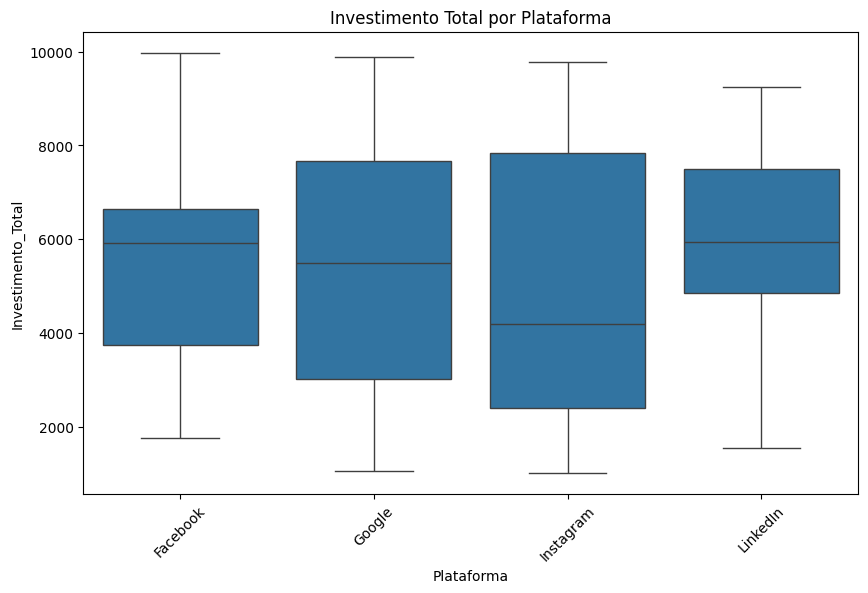

<ipython-input-108-283cadef392b>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  metricas_chaves_campanha = df_campanhas.groupby('Plataforma')[['Impressoes', 'Cliques', 'Conversoes', 'Investimento_Total']].mean()


,Impressoes,Cliques,Conversoes,Investimento_Total
Plataforma,,,,
Facebook,58028.650000,5162.150000,570.950000,5482.073500
Google,45100.035714,4845.964286,524.821429,5329.641786
Instagram,44641.931034,4105.206897,455.689655,4999.303103
LinkedIn,50187.652174,5012.521739,469.173913,6136.493913


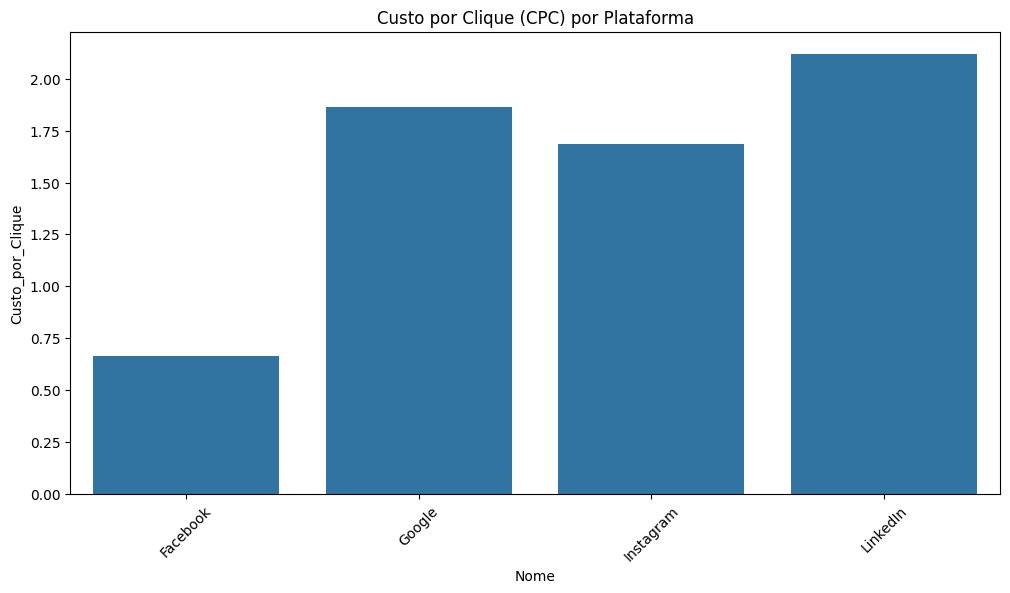

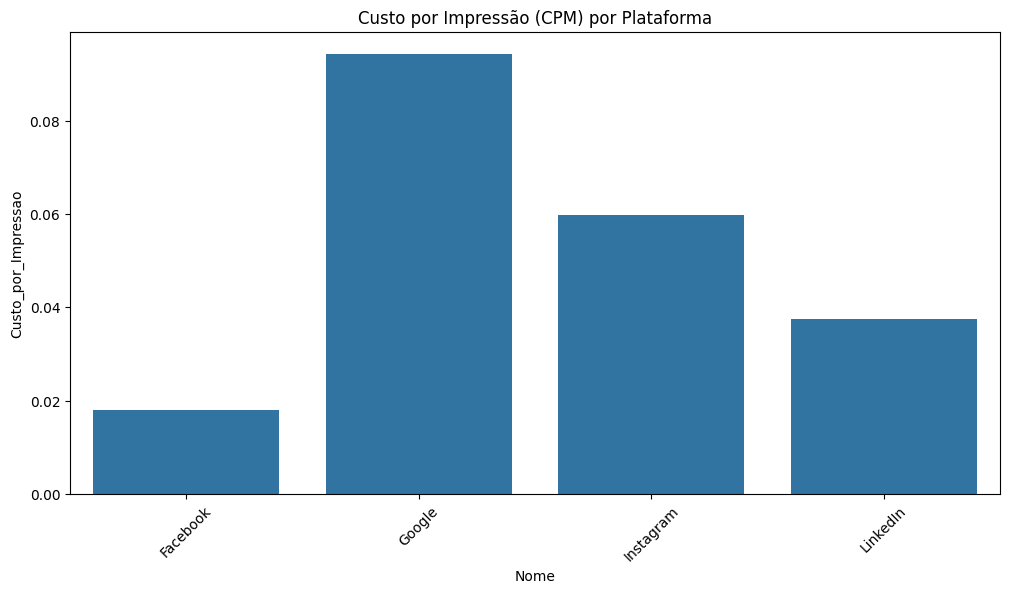

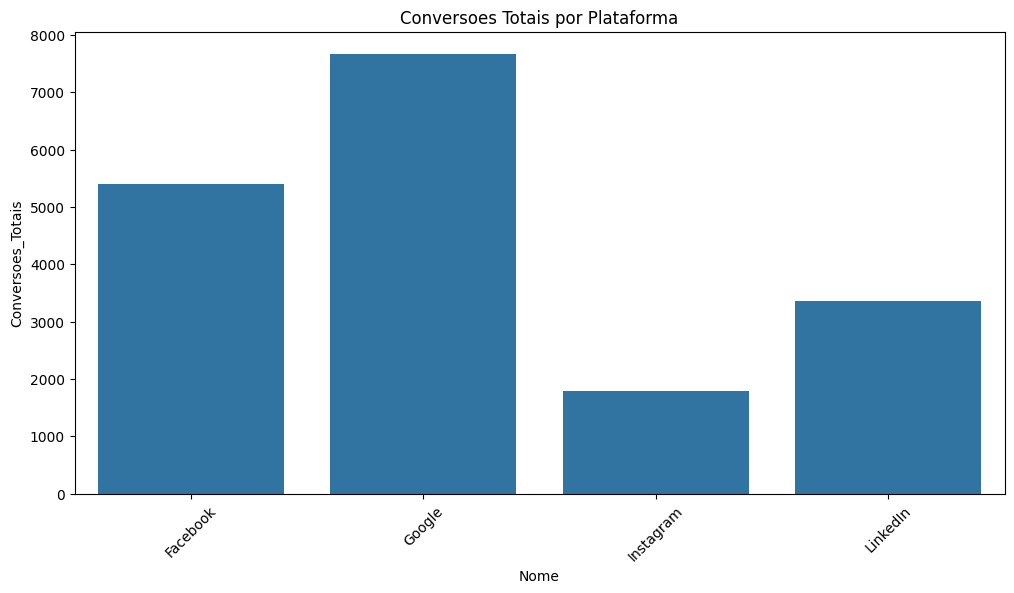

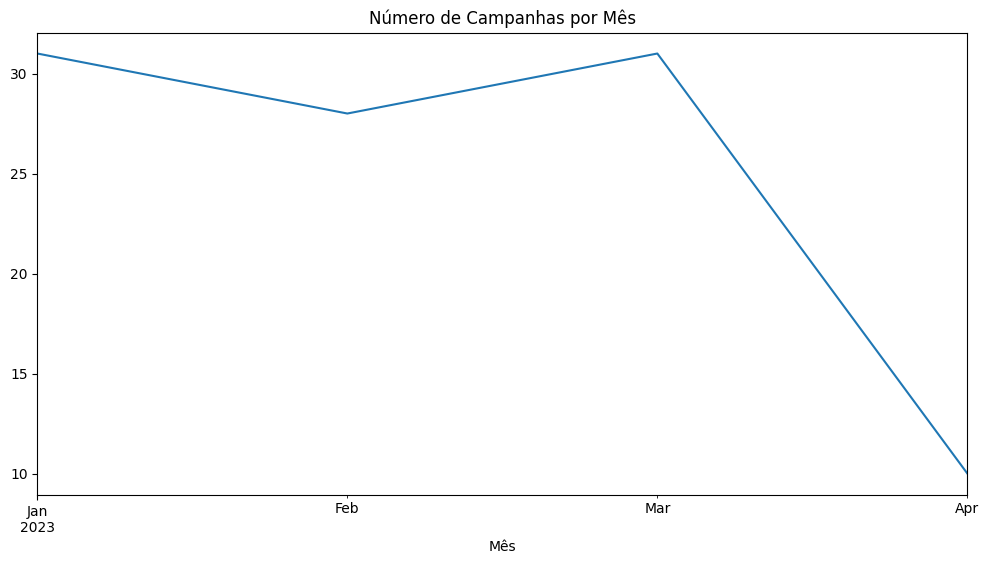

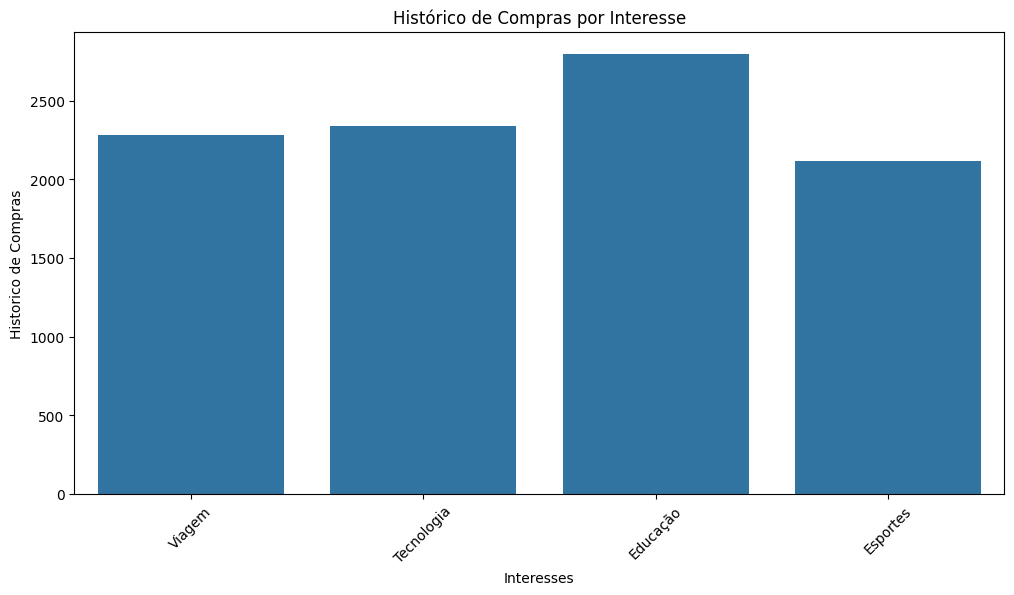

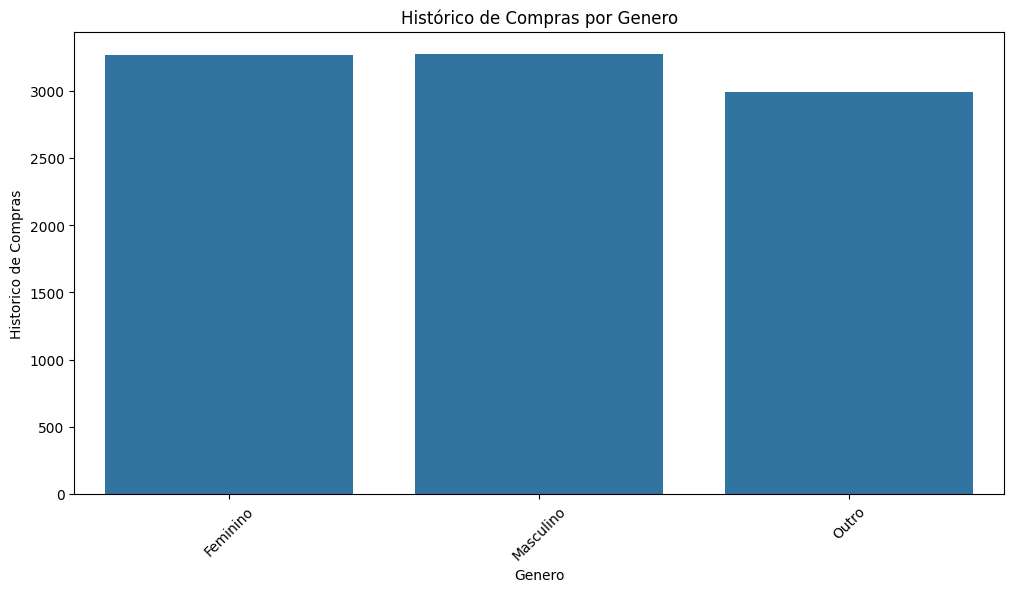

In [ ]:
# investimento total por plataforma
plt.figure(figsize=(10,6))
sns.boxplot(x='Plataforma', y='Investimento_Total', data=df_campanhas)
plt.title('Investimento Total por Plataforma')
plt.xticks(rotation=45)
plt.show()


# Métricas chave por plataforma:

metricas_chaves_campanha = df_campanhas.groupby('Plataforma')[['Impressoes', 'Cliques', 'Conversoes', 'Investimento_Total']].mean()
display(metricas_chaves_campanha)

plt.figure(figsize=(12, 6))
sns.barplot(x='Nome', y='Custo_por_Clique', data=df_plataformas)
plt.title('Custo por Clique (CPC) por Plataforma')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Nome', y='Custo_por_Impressao', data=df_plataformas)
plt.title('Custo por Impressão (CPM) por Plataforma')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Nome', y='Conversoes_Totais', data=df_plataformas)
plt.title('Conversoes Totais por Plataforma')
plt.xticks(rotation=45)
plt.show()

df_campanhas['Data_Inicio'] = pd.to_datetime(df_campanhas['Data_Inicio'])
campanhas_por_mes = df_campanhas.groupby(df_campanhas['Data_Inicio'].dt.to_period('M'))['ID_Campanha'].count()
plt.figure(figsize=(12, 6))
campanhas_por_mes.plot(kind='line')
plt.title('Número de Campanhas por Mês')
plt.xlabel('Mês')
plt.show()

# Historico de compra por interesse

plt.figure(figsize=(12, 6))
sns.barplot(x='Interesses', y='Historico_de_Compras', data=df_usuarios, estimator='sum', errorbar=None)
plt.title('Histórico de Compras por Interesse')
plt.xticks(rotation=45)
plt.ylabel('Historico de Compras')
plt.show()

# Historico de compra por genero

plt.figure(figsize=(12, 6))
sns.barplot(x='Genero', y='Historico_de_Compras', data=df_usuarios, estimator='sum', errorbar=None)
plt.title('Histórico de Compras por Genero')
plt.xticks(rotation=45)
plt.ylabel('Historico de Compras')
plt.show()



---

# Conexão e tratamento dados - recursos humanos

---



In [ ]:
#Definir as credenciais e informações da conexão
servidor = '35.231.208.44'
basededados = 'recursos_humanos'
usuario = 'bd-soulcode'
senha = '@lunos2024'

#Criar a conexão com a Base de Dados

def connect_to_database():
  try:
    connection = mysql.connector.connect(
        host = servidor,
        database = basededados,
        user = usuario,
        password = senha
    )
    if connection.is_connected():
      print("Conexão bem-sucedidade ao banco de dados MySQL!")
      return connection
  except Error as e:
    print("Erro ao conectar ao MySQL", e)
    return None

#Chamar a função de conexão
connection = connect_to_database()

def list_all_tables(connection):
    try:
        cursor = connection.cursor()
        # Executa o comando SHOW TABLES para listar todas as tabelas no banco de dados
        cursor.execute("SHOW TABLES;")
        tables = cursor.fetchall()

        if tables:
            print("Tabelas no banco de dados:")
            for table in tables:
                print(table[0])  # `table[0]` contém o nome da tabela
        else:
            print("Nenhuma tabela encontrada.")

    except Error as e:
        print("Erro ao listar tabelas", e)

    finally:
        cursor.close()

# Chamar a função de conexão
connection = connect_to_database()

if connection:
    # Listar todas as tabelas
    list_all_tables(connection)

#Converter a conexão com BD em DataFrame Pandas
import pandas as pd
def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    dfpd = pd.DataFrame(data, columns=columns)
    return dfpd
  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

#Chamar a conexao com o banco de dados
connection = connect_to_database()

if connection:
  query = "SELECT * FROM Avaliacoes;"
  df_avaliacoes = fecth_data_as_dataframe(connection, query)

  if df_avaliacoes is not None:
    print("Dados da Tabela Avaliacoes:")
    print(df_avaliacoes)

df_avaliacoes.dtypes

df_avaliacoes['Comentario'] = df_avaliacoes['Comentario'].astype('string')

if connection:
  query = "SELECT * FROM Desligamentos;"
  df_desligamentos = fecth_data_as_dataframe(connection, query)

  if df_desligamentos is not None:
    print("Dados da Tabela Desligamentos:")
    print(df_desligamentos)

df_desligamentos.dtypes

df_desligamentos['Motivo'] = df_desligamentos['Motivo'].astype('string')

if connection:
  query = "SELECT * FROM Funcionarios;"
  df_usuarios = fecth_data_as_dataframe(connection, query)

  if df_funcionarios is not None:
    print("Dados da Tabela Funcionarios:")
    print(df_funcionarios)

df_funcionarios.dtypes

df_funcionarios = df_funcionarios.rename(columns={'id_funcionario': 'ID_Funcionario'})

df_avaliacao_funcionarios = pd.merge(df_avaliacoes, df_funcionarios, on='ID_Funcionario', how='left')

df_rh = pd.merge(df_avaliacao_funcionarios, df_desligamentos, on='ID_Funcionario', how='left')

# df_rh = df_rh.drop_duplicates(subset=['ID_Funcionario'])
# df_rh = df_rh.drop(columns=['ID_Avaliacao', 'ID_Funcionario', 'ID_Desligamento'])

df_rh[['estado_civil','cargo','genero']] = df_rh[['estado_civil','cargo','genero']].astype(str)
df_rh['Data_Avaliacao'] = pd.to_datetime(df_rh['Data_Avaliacao'])
df_rh['Data_Desligamento'] = pd.to_datetime(df_rh['Data_Desligamento'])


df_rh['Comentario'] = df_rh['Comentario'].fillna("sem comentário")
df_rh['nome'] = df_rh['nome'].fillna("desconhecido")
df_rh['estado_civil'] = df_rh['estado_civil'].fillna("indefinido")
df_rh['Pontuacao'] = df_rh['Pontuacao'].fillna(0)
df_rh['dependentes'] = df_rh['dependentes'].mean()
df_rh['cargo'] = df_rh['cargo'].fillna("desconhecido")
df_rh['salario'] = df_rh['salario'].fillna(0)
df_rh['Data_Avaliacao'] = df_rh['Data_Avaliacao'].fillna(pd.Timestamp('1900-01-01'))
df_rh['data_nascimento'] = df_rh['data_nascimento'].fillna(pd.Timestamp('1900-01-01'))
df_rh['genero'] = df_rh['genero'].fillna("não especificado")
df_rh['estado_civil'] = df_rh['estado_civil'].fillna("indefinido")

display(df_rh)



Conexão bem-sucedidade ao banco de dados MySQL!
Conexão bem-sucedidade ao banco de dados MySQL!
Tabelas no banco de dados:
Avaliacoes
Desligamentos
Funcionarios
Conexão bem-sucedidade ao banco de dados MySQL!
Dados da Tabela Avaliacoes:
    ID_Avaliacao  ID_Funcionario Data_Avaliacao  Pontuacao  \
0              1              24     2022-01-31    2.16235   
1              2              30     2022-02-28    4.14788   
2              3              86     2022-03-31    1.44774   
3              4              92     2022-04-30    2.42389   
4              5               7     2022-05-31    4.91225   
..           ...             ...            ...        ...   
95            96              98     2029-12-31    3.87631   
96            97              16     2030-01-31    2.68047   
97            98              51     2030-02-28    4.62144   
98            99              39     2030-03-31    3.95869   
99           100              86     2030-04-30    1.76504   

                  

,ID_Avaliacao,ID_Funcionario,Data_Avaliacao,Pontuacao,Comentario,nome,data_nascimento,genero,estado_civil,dependentes,cargo,salario,ID_Desligamento,Data_Desligamento,Motivo
0,1,24,2022-01-31,2.16235,Walk PM address worker experience.,desconhecido,1900-01-01,nan,nan,1.666667,nan,0.0,1.0,2023-01-01,Pedido de Demissão
1,1,24,2022-01-31,2.16235,Walk PM address worker experience.,desconhecido,1900-01-01,nan,nan,1.666667,nan,0.0,14.0,2023-04-02,Corte de Custos
2,2,30,2022-02-28,4.14788,Six learn executive term during team investmen...,desconhecido,1900-01-01,nan,nan,1.666667,nan,0.0,3.0,2023-01-15,Pedido de Demissão
3,2,30,2022-02-28,4.14788,Six learn executive term during team investmen...,desconhecido,1900-01-01,nan,nan,1.666667,nan,0.0,16.0,2023-04-16,Desempenho Insatisfatório
4,3,86,2022-03-31,1.44774,Check whole building just there cup.,desconhecido,1900-01-01,nan,nan,1.666667,nan,0.0,NaN,NaT,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,96,98,2029-12-31,3.87631,Thus when success administration happen.,desconhecido,1900-01-01,nan,nan,1.666667,nan,0.0,NaN,NaT,<NA>
109,97,16,2030-01-31,2.68047,Majority people especially bring base.,desconhecido,1900-01-01,nan,nan,1.666667,nan,0.0,50.0,2023-12-10,Corte de Custos
110,98,51,2030-02-28,4.62144,In dog short western necessary enjoy.,desconhecido,1900-01-01,nan,nan,1.666667,nan,0.0,NaN,NaT,<NA>
111,99,39,2030-03-31,3.95869,Doctor program debate face sometimes hard hit.,desconhecido,1900-01-01,nan,nan,1.666667,nan,0.0,NaN,NaT,<NA>


---

# Analises estatísticas - recursos humanos
---




Turnover por Motivo:
 Motivo
Corte de Custos              58.0
Desempenho Insatisfatório    14.0
Pedido de Demissão           28.0
Name: ID_Funcionario, dtype: float64

Tempo Médio de Permanência (Desligados): 45110.22 dias


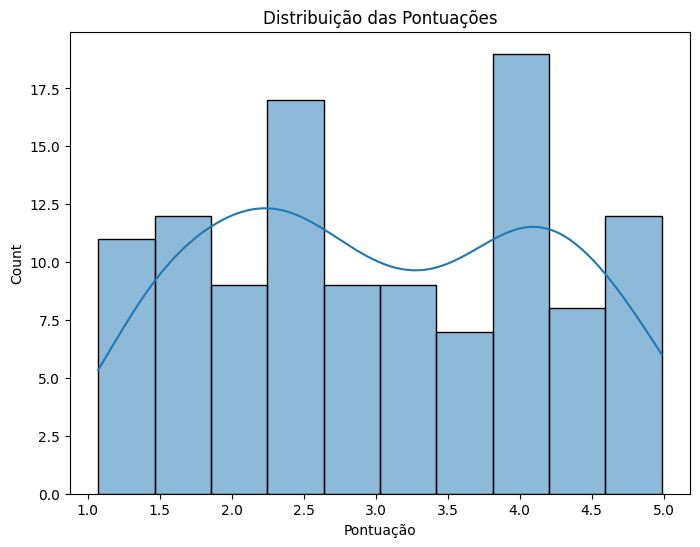

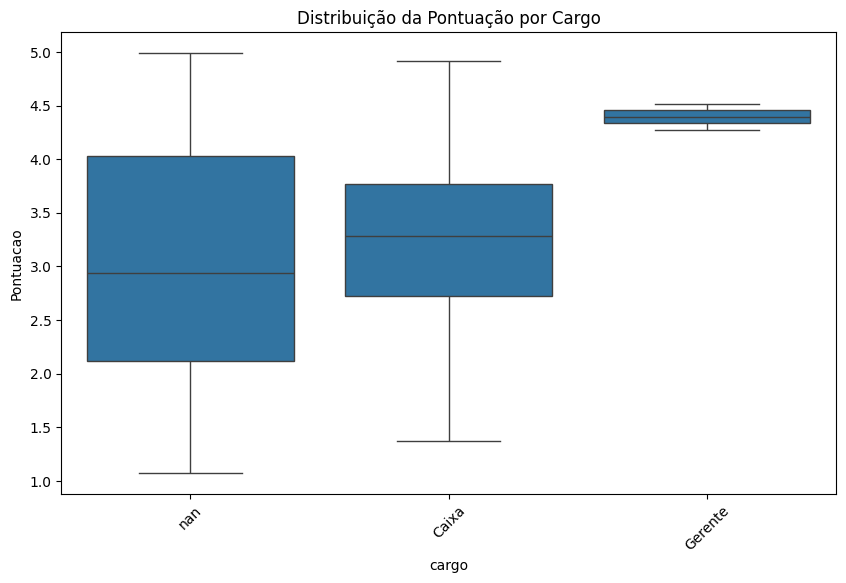

In [ ]:

# Turnover por Motivo
turnover_motivo = df_rh.groupby('Motivo')['ID_Funcionario'].count()/total_desligados * 100
print("\nTurnover por Motivo:\n", turnover_motivo)

# Tempo médio de permanência para quem foi desligado
tempo_permanencia = (df_rh['Data_Desligamento'] - df_rh['data_nascimento']).dt.days
tempo_medio_permanencia = tempo_permanencia.mean()
print(f"\nTempo Médio de Permanência (Desligados): {tempo_medio_permanencia:.2f} dias")

# Distribuição das Pontuações
plt.figure(figsize=(8, 6))
sns.histplot(df_rh['Pontuacao'], bins=10, kde=True)
plt.title('Distribuição das Pontuações')
plt.xlabel('Pontuação')
plt.show()

# Boxplot da Pontuação por Cargo
plt.figure(figsize=(10, 6))
sns.boxplot(x='cargo', y='Pontuacao', data=df_rh)
plt.title('Distribuição da Pontuação por Cargo')
plt.xticks(rotation=45)
plt.show()

---

# Conexão e tratamento dados - loja

---



In [ ]:
#Definir as credenciais e informações da conexão
servidor = '35.231.208.44'
basededados = 'loja'
usuario = 'bd-soulcode'
senha = '@lunos2024'

#Criar a conexão com a Base de Dados

def connect_to_database():
  try:
    connection = mysql.connector.connect(
        host = servidor,
        database = basededados,
        user = usuario,
        password = senha
    )
    if connection.is_connected():
      print("Conexão bem-sucedidade ao banco de dados MySQL!")
      return connection
  except Error as e:
    print("Erro ao conectar ao MySQL", e)
    return None

#Chamar a função de conexão
connection = connect_to_database()

def list_all_tables(connection):
    try:
        cursor = connection.cursor()
        # Executa o comando SHOW TABLES para listar todas as tabelas no banco de dados
        cursor.execute("SHOW TABLES;")
        tables = cursor.fetchall()

        if tables:
            print("Tabelas no banco de dados:")
            for table in tables:
                print(table[0])  # `table[0]` contém o nome da tabela
        else:
            print("Nenhuma tabela encontrada.")

    except Error as e:
        print("Erro ao listar tabelas", e)

    finally:
        cursor.close()

# Chamar a função de conexão
connection = connect_to_database()

if connection:
    # Listar todas as tabelas
    list_all_tables(connection)

#Converter a conexão com BD em DataFrame Pandas
import pandas as pd
def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    dfpd = pd.DataFrame(data, columns=columns)
    return dfpd
  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

#Chamar a conexao com o banco de dados
connection = connect_to_database()

if connection:
  query = "SELECT * FROM categorias;"
  df_categorias = fecth_data_as_dataframe(connection, query)

  if df_categorias is not None:
    print("Dados da Tabela categorias:")
    print(df_categorias)

df_categorias.dtypes

df_categorias['nome'] = df_categorias['nome'].astype('string')

if connection:
  query = "SELECT * FROM clientes;"
  df_clientes = fecth_data_as_dataframe(connection, query)

  if df_clientes is not None:
    print("Dados da Tabela clientes:")
    print(df_clientes)

df_clientes.dtypes

df_clientes['data_nascimento'] = pd.to_datetime(df_clientes['data_nascimento'])

df_clientes[['nome','telefone','email','endereco','cidade']] = df_clientes[['nome','telefone','email','endereco','cidade']].astype('string')

df_clientes['genero'] = df_clientes['genero'].astype('category')

if connection:
  query = "SELECT * FROM fornecedores;"
  df_fornecedores = fecth_data_as_dataframe(connection, query)

  if df_fornecedores is not None:
    print("Dados da Tabela fornecedores:")
    print(df_fornecedores)

df_fornecedores.dtypes

df_fornecedores[['nome','endereco','cidade']] = df_fornecedores[['nome','endereco','cidade']].astype('string')

if connection:
  query = "SELECT * FROM funcionarios;"
  df_funcionarios = fecth_data_as_dataframe(connection, query)

  if df_funcionarios is not None:
    print("Dados da Tabela funcionarios:")
    print(df_funcionarios)

df_funcionarios.dtypes

df_funcionarios['data_nascimento'] = pd.to_datetime(df_funcionarios['data_nascimento'])

df_funcionarios[['genero','estado_civil','cargo']] = df_funcionarios[['genero','estado_civil','cargo']].astype('category')

df_funcionarios['nome'] = df_funcionarios['nome'].astype('string')


if connection:
  query = "SELECT * FROM produtos;"
  df_produtos = fecth_data_as_dataframe(connection, query)

  if df_produtos is not None:
    print("Dados da Tabela produtos:")
    print(df_produtos)

df_produtos.dtypes

df_produtos['nome'] = df_produtos['nome'].astype('string')

if connection:
  query = "SELECT * FROM vendas;"
  df_vendas = fecth_data_as_dataframe(connection, query)

  if df_vendas is not None:
    print("Dados da Tabela vendas:")
    print(df_vendas)

df_vendas.dtypes

df_vendas['data'] = pd.to_datetime(df_vendas['data'])

# juntar os dataframes

df_vendas_produtos = pd.merge(df_vendas, df_produtos, on='id_produto', how='left', suffixes=('', '_produto'))

df_vendas_produtos_categorias = pd.merge(df_vendas_produtos, df_categorias, on='id_categoria', how='left', suffixes=('', '_categoria'))

df_vendas_produtos_categorias_clientes = pd.merge(df_vendas_produtos_categorias, df_clientes, on='id_cliente', how='left', suffixes=('', '_cliente'))

df_vendas_produtos_categorias_clientes_fornecedores = pd.merge(
    df_vendas_produtos_categorias_clientes,
    df_fornecedores,
    on='id_fornecedor',
    how='left',
    suffixes=('', '_fornecedor')
)

df_loja = pd.merge(
    df_vendas_produtos_categorias_clientes_fornecedores,
    df_funcionarios,
    on='id_funcionario',
    how='left',
    suffixes=('', '_funcionario')
)

df_loja = df_loja.rename(columns={
    'nome': 'nome_cliente',
    'nome_produto': 'nome_produto',
    'nome_categoria': 'nome_categoria',
    'nome_fornecedor': 'nome_fornecedor',
    'nome_funcionario': 'nome_funcionario'
})

display(df_loja)


Conexão bem-sucedidade ao banco de dados MySQL!
Conexão bem-sucedidade ao banco de dados MySQL!
Tabelas no banco de dados:
categorias
clientes
exemplo
fornecedores
funcionarios
produtos
query
vendas
Conexão bem-sucedidade ao banco de dados MySQL!
Dados da Tabela categorias:
   id_categoria         nome
0             1  Eletrônicos
1             2       Roupas
2             3    Alimentos
3             4       Móveis
4             5   Cosméticos
Dados da Tabela clientes:
    id_cliente               nome         telefone          cidade  \
0            1         João Silva  (11) 98765-4321       São Paulo   
1            2       Maria Santos  (21) 98765-5432  Rio de Janeiro   
2            3    Carlos Oliveira  (31) 98765-6543  Belo Horizonte   
3            4          Ana Souza  (51) 98765-7654    Porto Alegre   
4            5       Pedro Santos  (41) 98765-8765        Curitiba   
5            6       Luciana Lima  (11) 98765-9876       São Paulo   
6            7       Rafael Costa  

,id_venda,id_produto,quantidade,id_cliente,id_funcionario,data,nome_cliente,preco,id_categoria,id_fornecedor,...,cidade_fornecedor,endereco_fornecedor,cnpj,nome_funcionario,data_nascimento_funcionario,genero_funcionario,estado_civil,dependentes,cargo,salario
0,1,1,2,1,1,2024-07-01,Smartphone X,1500.0,1,1,...,São Paulo,"Rua G, 234",1234,Fernando Silva,1982-07-15,Masculino,Casado,2,Vendedor,3500.0
1,2,3,1,2,2,2024-07-02,Camiseta Z,50.0,2,3,...,Belo Horizonte,"Rua I, 890",5678,Aline Costa,1980-12-20,Feminino,Solteira,0,Gerente,6000.0
2,3,5,1,3,1,2024-07-03,Sofá Confort,2500.0,4,1,...,São Paulo,"Rua G, 234",1234,Fernando Silva,1982-07-15,Masculino,Casado,2,Vendedor,3500.0
3,4,2,1,4,3,2024-07-04,Notebook Y,3000.0,1,2,...,Rio de Janeiro,"Av. H, 567",9876,Marcos Oliveira,1975-03-10,Masculino,Divorciado,1,Caixa,2800.0
4,5,4,3,5,2,2024-07-05,Arroz Integral,10.0,3,3,...,Belo Horizonte,"Rua I, 890",5678,Aline Costa,1980-12-20,Feminino,Solteira,0,Gerente,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,119,18,1,39,7,2024-10-27,Blusa de Frio,80.0,2,3,...,Belo Horizonte,"Rua I, 890",5678,Rodrigo Santos,1977-11-30,Masculino,Divorciado,2,Caixa,2800.0
119,120,20,2,40,8,2024-10-28,Sapateira,200.0,4,1,...,São Paulo,"Rua G, 234",1234,Mariana Ferreira,1985-02-15,Feminino,Casada,1,Gerente,6000.0
120,121,1,1,1,9,2024-10-29,Smartphone X,1500.0,1,1,...,São Paulo,"Rua G, 234",1234,Lucas Costa,1989-08-10,Masculino,Solteiro,0,Vendedor,3400.0
121,122,3,2,2,10,2024-10-30,Camiseta Z,50.0,2,3,...,Belo Horizonte,"Rua I, 890",5678,Ana Oliveira,1984-03-20,Feminino,Casada,2,Caixa,3000.0


---

# Analises estatísticas - loja
---



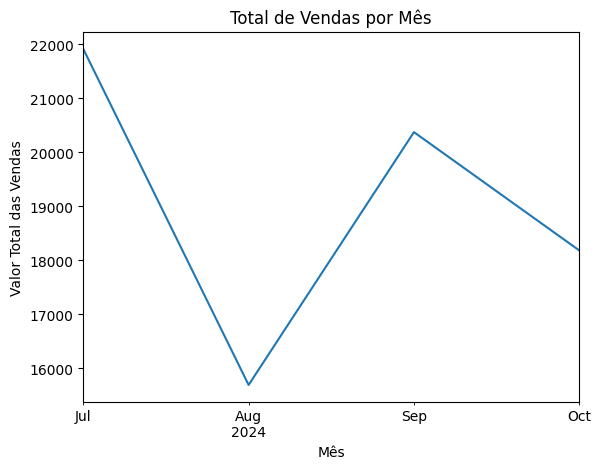

<ipython-input-113-195b72bc717f>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clientes_estado_civil = df_loja.groupby('estado_civil')['id_cliente'].nunique().sort_values(ascending=False)


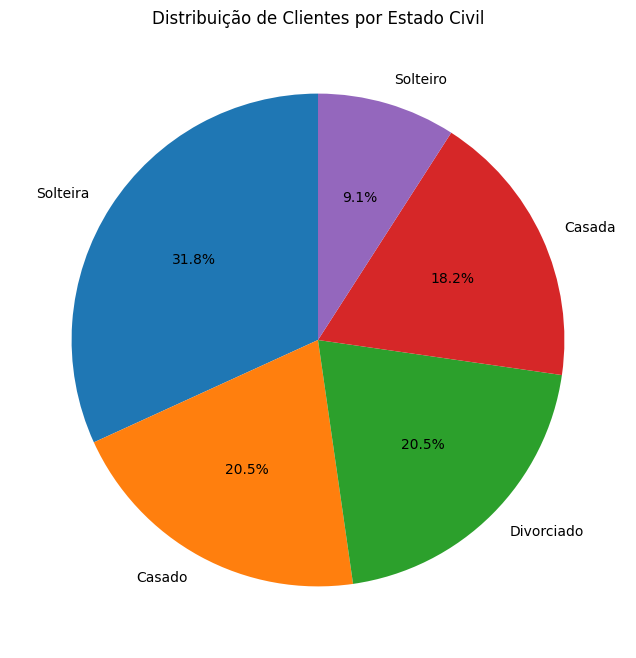

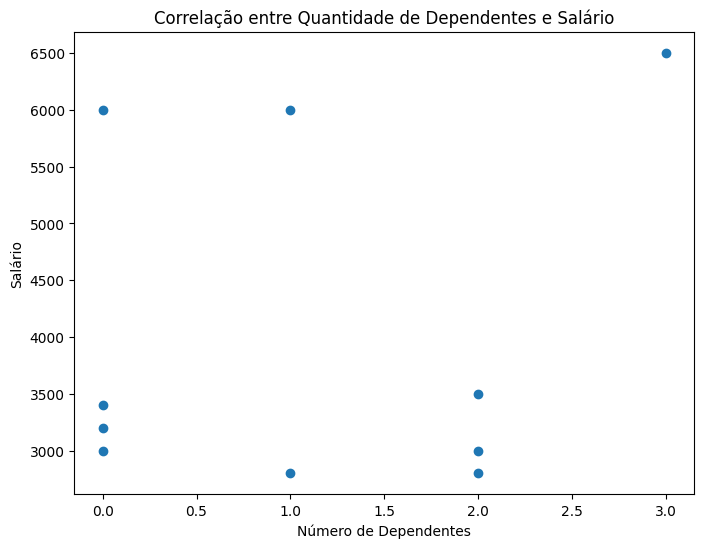

<ipython-input-113-195b72bc717f>:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vendas_por_faixa = df_loja.groupby('faixa_preco')['preco'].sum()


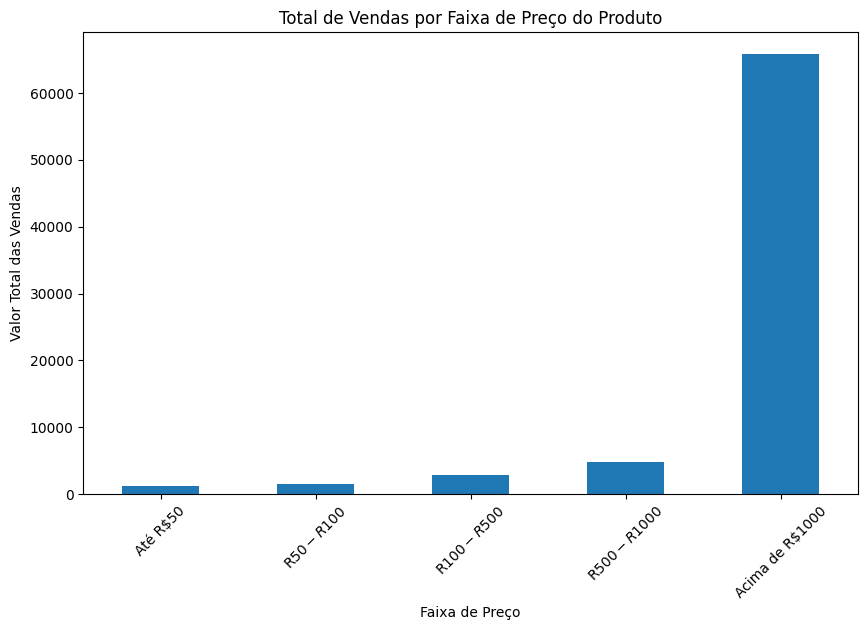

In [ ]:
# Vendas por Mês
df_loja['data'] = pd.to_datetime(df_loja['data'])
vendas_por_mes = df_loja.groupby(df_loja['data'].dt.to_period('M'))['preco'].sum()
vendas_por_mes.plot(kind='line')
plt.title('Total de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Total das Vendas')
plt.show()

# soma de clientes por estado civil
clientes_estado_civil = df_loja.groupby('estado_civil')['id_cliente'].nunique().sort_values(ascending=False)

# gráfico de setores para visualizar a distribuição por Estado Civil
plt.figure(figsize=(8, 8))
plt.pie(clientes_estado_civil, labels=clientes_estado_civil.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Clientes por Estado Civil')
plt.show()

# Remove duplicatas de funcionários
funcionarios_unicos = df_loja[['nome_funcionario', 'dependentes', 'salario']].drop_duplicates()

# gráfico de dispersão para visualizar a correlação
plt.figure(figsize=(8, 6))
plt.scatter(funcionarios_unicos['dependentes'], funcionarios_unicos['salario'])
plt.title('Correlação entre Quantidade de Dependentes e Salário')
plt.xlabel('Número de Dependentes')
plt.ylabel('Salário')
plt.show()

# faixas de preço
faixas_preco = [0, 50, 100, 500, 1000, float('inf')]
rotulos_faixas = ['Até R$50', 'R$50-R$100', 'R$100-R$500', 'R$500-R$1000', 'Acima de R$1000']
df_loja['faixa_preco'] = pd.cut(df_loja['preco'], bins=faixas_preco, labels=rotulos_faixas)

# Calcula o total de vendas por faixa de preço
vendas_por_faixa = df_loja.groupby('faixa_preco')['preco'].sum()

# histograma para visualizar as vendas por faixa de preço
plt.figure(figsize=(10, 6))
vendas_por_faixa.plot(kind='bar')
plt.title('Total de Vendas por Faixa de Preço do Produto')
plt.xlabel('Faixa de Preço')
plt.ylabel('Valor Total das Vendas')
plt.xticks(rotation=45)
plt.show()